# Convolutional Neural Network

# Part 1 - Building the CNN

In [13]:
#folder structure
#dataset
    #test_set
        #cats
        #dogs
    #train_set
        #cats
        #dogs

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [15]:
# Initialising the CNN
classifier = Sequential()

## step 1 : Convolution

In [16]:
# filters - no of feature detectors (filters,convolution kernel), for each filter, feature map will be created
# kernel_size - no of rows and columns in the feature detector
# strides - strides of the convolution along the width and height
# input_shape - specify the expected format of our input images
#  (rows, cols, no_of_channels), channels=3 since coloured images
#activation - to remove linearity
classifier.add(Convolution2D(filters=32, kernel_size=(3,3) , input_shape=(64,64,3), activation='relu' ))

## Step 2 - Pooling

In [17]:
# pool_size - windows size, most of the time we use 2,2
classifier.add(MaxPooling2D(pool_size=(2,2)))

## adding another convolution layer

In [18]:
#adding another convolution layer
# no need to define a input_layer since this is not the very first layer (Keras knows the input size)
#here the input is the pooled feature maps from the above layer
# in general filter size is dobled (64), but in this case 32 is enough
classifier.add(Convolution2D(filters=32, kernel_size=(3,3) , activation='relu' ))

## Step 3 - Flattening

In [19]:
# 
classifier.add(Flatten())

## Step 4 - Full Connection

In [20]:
# we are addding the fully connected hidden layer
#units - no of nodes in the hidden layer, should not be too small, power of 2 is generally used
classifier.add(Dense(units=128, activation='relu' ))
#output layer
classifier.add(Dense(units=1, activation='sigmoid' ))

In [21]:
# compiling the CNN
# if there are more than two classes use categorical cross entropy for the loss function
classifier.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

# Part 2 - Fitting the CNN to the images

# preprocessing

In [22]:
# too few images -> overfitting, not able to find generalized patterns
# we need to have many images or a trick - > image augmentation
# image Augmentation - amount of training images are augmented (rotate, flip,...) to minimize overfitting

# get the code from the Keras documentation , preprocesing -> image preprocessing, 
#                               Example of using .flow_from_directory(directory):

In [23]:
from keras.preprocessing.image import  ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),  #dimension expected by CNN
        batch_size=32,
        class_mode='binary')  #binary or more than 2

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [25]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=8000, #all the observations passes through the CNN. thus no of images in the training set
        epochs=25,
        validation_data=test_set,
        validation_steps=2000 # no of images in the test set
)

Epoch 1/25
8000/8000 [==============================] - 1345s - loss: 0.3891 - acc: 0.8140 - val_loss: 0.5388 - val_acc: 0.8034
Epoch 2/25
8000/8000 [==============================] - 1333s - loss: 0.1747 - acc: 0.9287 - val_loss: 0.6864 - val_acc: 0.8103
Epoch 3/25
8000/8000 [==============================] - 1331s - loss: 0.1031 - acc: 0.9608 - val_loss: 0.8171 - val_acc: 0.8027
Epoch 4/25
8000/8000 [==============================] - 1334s - loss: 0.0759 - acc: 0.9719 - val_loss: 0.8924 - val_acc: 0.8038
Epoch 5/25
8000/8000 [==============================] - 1331s - loss: 0.0589 - acc: 0.9788 - val_loss: 1.0637 - val_acc: 0.8150
Epoch 6/25
8000/8000 [==============================] - 1330s - loss: 0.0495 - acc: 0.9827 - val_loss: 1.0499 - val_acc: 0.8021
Epoch 7/25
8000/8000 [==============================] - 1331s - loss: 0.0429 - acc: 0.9850 - val_loss: 1.1242 - val_acc: 0.8021
Epoch 8/25
8000/8000 [==============================] - 1331s - loss: 0.0377 - acc: 0.9873 - val_loss: 1

# Making new predictions

In [29]:
#making new predictions (single prediction)
import numpy as np
from keras.preprocessing import image

In [75]:
#read image
file_name='''/home/cloudera/courses/2017Aug_udemy_DeepLearningAZ/Deep_Learning_AZ/Volume1_Supervised_Deep_Learning/Part2_Convolutional_Neural_Network_CNN/Section8_Building_a_CNN/dataset/single_prediction/cat_or_dog_2.jpg'''
test_image=image.load_img(file_name, target_size=(64,64))

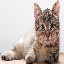

In [76]:
test_image

In [77]:
#image to array to get 3D array as our input layer
test_image=image.img_to_array(test_image)

In [78]:
test_image.shape

(64, 64, 3)

In [79]:
# prediction inputs take inputs in batches. 
#Thus there shoud be 04 dimensions to the input, including dimension to store batch information
#input expects this new dimension as the first index, axis=0
test_image=np.expand_dims(test_image,axis=0)

In [80]:
test_image.shape

(1, 64, 64, 3)

In [81]:
result=classifier.predict(test_image)

In [82]:
result

array([[ 1.]], dtype=float32)

In [83]:
# does 1 corresponds to cat or dog?
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [84]:
if result[0][0]==1:
    print 'Dog'
else:
    print 'Cat'

Dog
